In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [500]:
df = pd.read_csv("Data_train.csv")

In [501]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [502]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [503]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [504]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

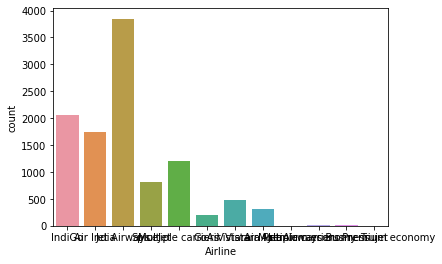

In [505]:
sns.countplot(x = df['Airline'], data = df)

In [506]:
df.shape

(10683, 11)

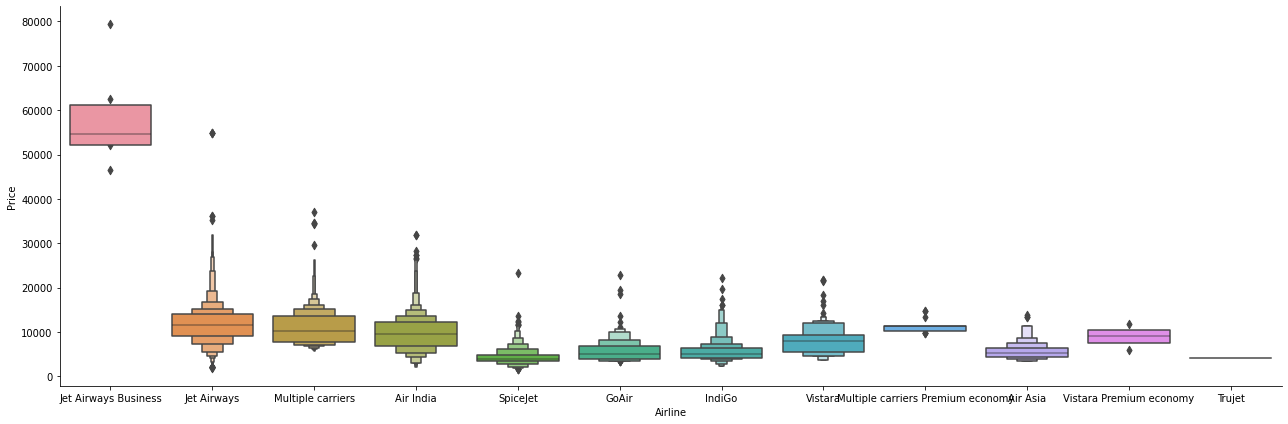

In [507]:
sns.catplot(y ='Price', x = 'Airline', data= df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 )

In [508]:
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

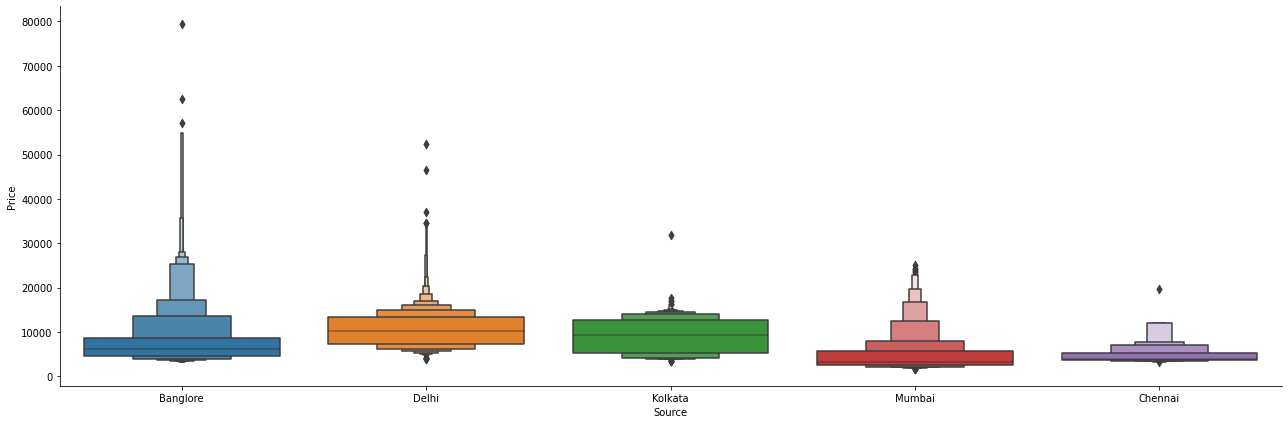

In [509]:
sns.catplot(y ='Price', x = 'Source', data= df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 )

In [510]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

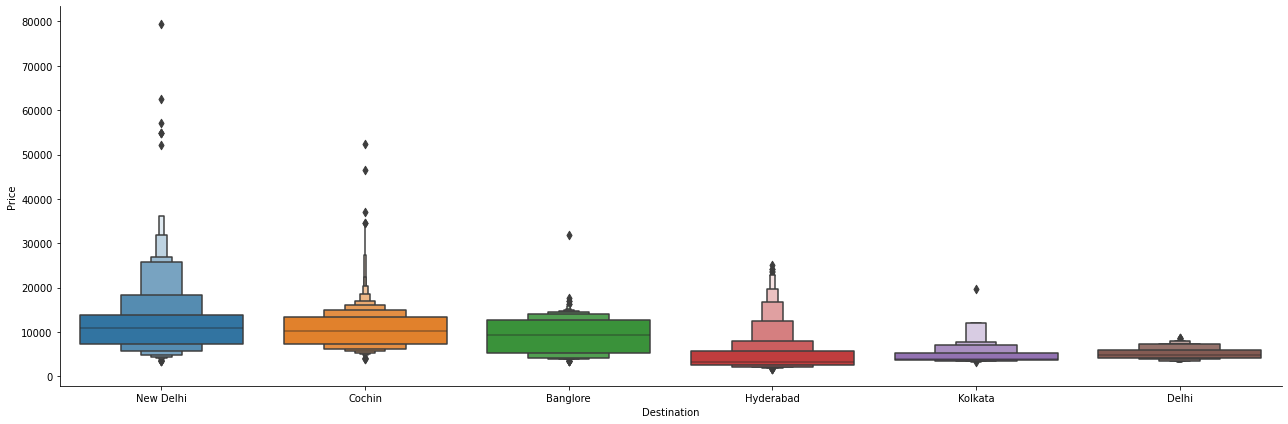

In [511]:
sns.catplot(y ='Price', x = 'Destination', data= df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 )

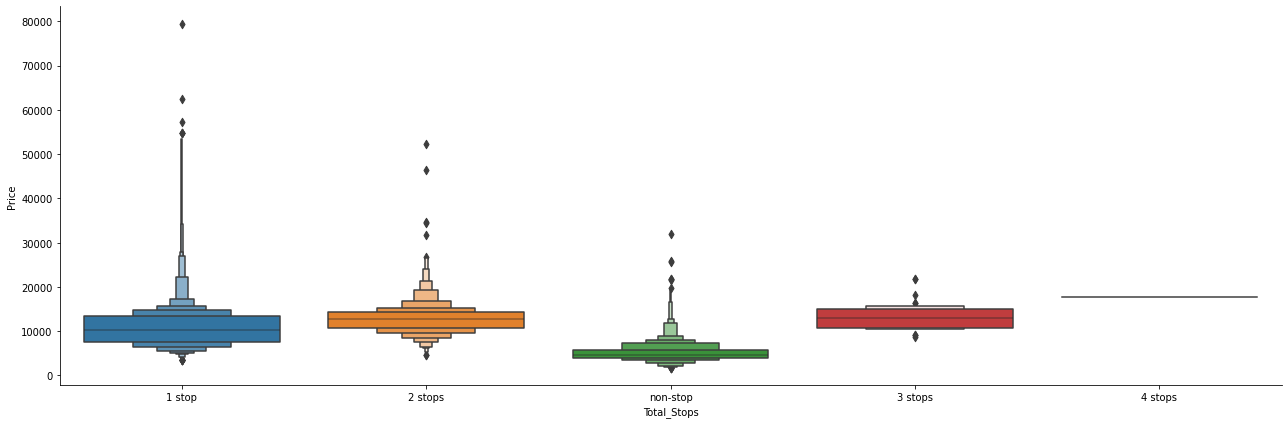

In [512]:
sns.catplot(y ='Price', x = 'Total_Stops', data= df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 )

In [513]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

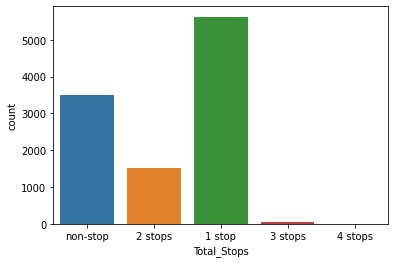

In [514]:
sns.countplot(x = df['Total_Stops'], data = df)

## Splitting the Date of Journey into the Day, Month and Year Columns

In [515]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [516]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


## We have to drop the Date_of_Journey column because it is no longer useful

In [517]:
df = df.drop(['Date_of_Journey'], axis = 1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


## I converted the Date, Month and Year columns into Integer

In [518]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [519]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [520]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

## Lets have an idea about the additional information

In [521]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

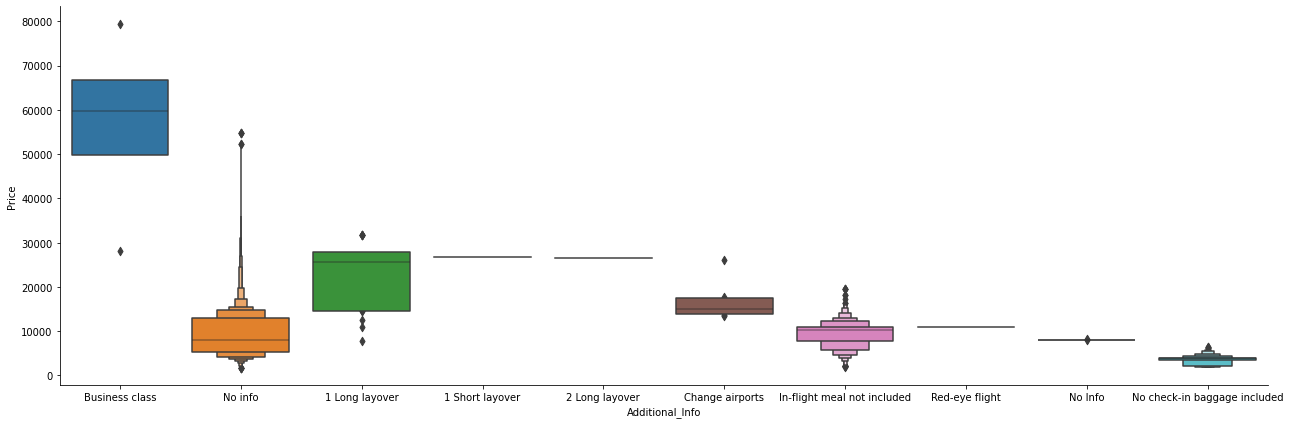

In [522]:
sns.catplot(y ='Price', x = "Additional_Info", data= df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3 )

## We need look at the arrival time

In [523]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [524]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


## Lets look at the total stops columns

In [525]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [526]:
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')

In [527]:
df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [528]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [529]:
df['Total_Stops'].isnull().sum()

0

## There is still non-stop in the data which have to be converted to numerical values

In [530]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0 stop')

In [531]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0 stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0 stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0 stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0 stop,No info,12648,1,3,2019


In [532]:
## We have to separte the Total stops columns into integer 

In [533]:
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]

In [534]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,2019


In [535]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [536]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,2019


## Lets look at the Arrival Hours

In [537]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [538]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [539]:
df = df.drop(['Arrival_Time'], axis = 1)

In [540]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,0,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,2h 30m,0,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,2h 35m,0,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,3h,0,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,2h 40m,0,No info,12648,1,3,2019,14,10


In [541]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [542]:
df['Departure_Hour'] = df['Departure_Hour'].astype(int)

In [543]:
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [544]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,2h 30m,0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,2h 35m,0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,3h,0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,2h 40m,0,No info,12648,1,3,2019,14,10,11,30


In [545]:
df = df.drop(['Dep_Time'], axis = 1)

In [546]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int32
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Minute       int32
Departure_Hour       int32
Departure_Minute     int32
dtype: object

## Lets separate the route and put them in different columns

In [547]:
df['Rout_1'] = df['Route'].str.split('?').str[0]
df['Rout_2'] = df['Route'].str.split('?').str[1]
df['Rout_3'] = df['Route'].str.split('?').str[2]
df['Rout_4'] = df['Route'].str.split('?').str[3]
df['Rout_5'] = df['Route'].str.split('?').str[4]

In [548]:
df['Rout_1'].fillna("None", inplace = True)
df['Rout_2'].fillna("None", inplace = True)
df['Rout_3'].fillna("None", inplace = True)
df['Rout_4'].fillna("None", inplace = True)
df['Rout_5'].fillna("None", inplace = True)

df['Rout_1'] = df['Route'].str.split('→').str[0]
df['Rout_2'] = df['Route'].str.split('→').str[1]
df['Rout_3'] = df['Route'].str.split('→').str[2]
df['Rout_4'] = df['Route'].str.split('→').str[3]
df['Rout_5'] = df['Route'].str.split('→').str[4]

In [549]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Rout_1              0
Rout_2              0
Rout_3              0
Rout_4              0
Rout_5              0
dtype: int64

In [550]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Rout_1,Rout_2,Rout_3,Rout_4,Rout_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,0,No info,4107,9,4,2019,22,25,19,55,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,0,No info,4145,27,4,2019,23,20,20,45,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,0,No info,7229,27,4,2019,11,20,8,20,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,0,No info,12648,1,3,2019,14,10,11,30,BLR,DEL,None,None,None


In [551]:
df = df.drop(['Duration', 'Route'], axis = 1)

In [552]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Rout_1,Rout_2,Rout_3,Rout_4,Rout_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,25,19,55,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,20,20,45,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,20,8,20,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,10,11,30,BLR,DEL,None,None,None


In [553]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Rout_1              0
Rout_2              0
Rout_3              0
Rout_4              0
Rout_5              0
dtype: int64

## Lets transform the Categorial columns using the LabelEncoder

In [554]:
from sklearn.preprocessing import LabelEncoder

In [555]:
le = LabelEncoder()

In [556]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['Rout_1'] = le.fit_transform(df['Rout_1'])
df['Rout_2'] = le.fit_transform(df['Rout_2']) 
df['Rout_3'] = le.fit_transform(df['Rout_3'])
df['Rout_4'] = le.fit_transform(df['Rout_4'])
df['Rout_5'] = le.fit_transform(df['Rout_5'])

In [557]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Rout_1,Rout_2,Rout_3,Rout_4,Rout_5
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,0,13,29,13,5
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,2019,22,25,19,55,2,5,29,13,5
10679,1,3,0,0,8,4145,27,4,2019,23,20,20,45,2,5,29,13,5
10680,4,0,2,0,8,7229,27,4,2019,11,20,8,20,0,13,29,13,5
10681,10,0,5,0,8,12648,1,3,2019,14,10,11,30,0,13,29,13,5


## Lets drop the year column

In [558]:
df = df.drop(['Year'], axis = 1)

In [559]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Rout_1,Rout_2,Rout_3,Rout_4,Rout_5
0,3,0,5,0,8,3897,24,3,1,10,22,20,0,13,29,13,5
1,1,3,0,2,8,7662,1,5,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882,9,6,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218,12,5,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302,1,3,21,35,16,50,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,22,25,19,55,2,5,29,13,5
10679,1,3,0,0,8,4145,27,4,23,20,20,45,2,5,29,13,5
10680,4,0,2,0,8,7229,27,4,11,20,8,20,0,13,29,13,5
10681,10,0,5,0,8,12648,1,3,14,10,11,30,0,13,29,13,5


In [561]:
X = df.drop(['Price'], axis = 1)
X.shape

(10683, 16)

In [562]:
y = df['Price']
y.shape

(10683,)

In [563]:
from sklearn.model_selection import train_test_split

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [565]:
from sklearn.linear_model import Lasso

In [566]:
from sklearn.feature_selection import SelectFromModel

In [567]:
lasmodel = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [569]:
lasmodel.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [570]:
lasmodel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [571]:
selected_features = X_train.columns[(lasmodel.get_support())]

In [572]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Rout_1', 'Rout_2', 'Rout_3', 'Rout_4', 'Rout_5'],
      dtype='object')

In [573]:
from sklearn.ensemble import ExtraTreesRegressor

In [574]:
etr = ExtraTreesRegressor()

In [575]:
etr.fit(X_train, y_train)

ExtraTreesRegressor()

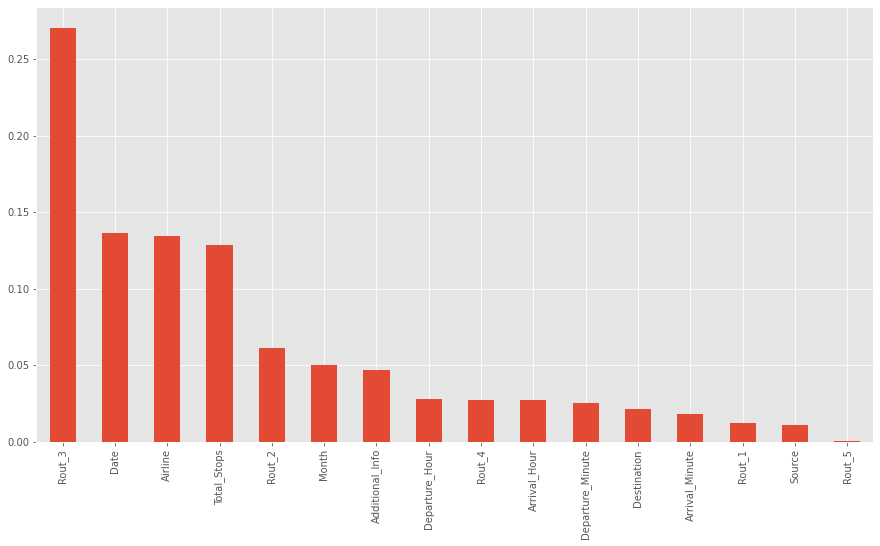

In [577]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 8))
feature_importances = pd.Series(etr.feature_importances_, index = X.columns)
feature_importances.nlargest(35).plot(kind = 'bar')
plt.show()

In [580]:
from sklearn.ensemble import RandomForestRegressor

In [581]:
reg_rf = RandomForestRegressor()

In [582]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [583]:
reg_rf.score(X_train, y_train)

0.9802952984544793

In [584]:
reg_rf.score(X_test, y_test)

0.9128662492459018

In [585]:
y_pred = reg_rf.predict(X_test)

c:\users\user\pycharmprojects\workplace23\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


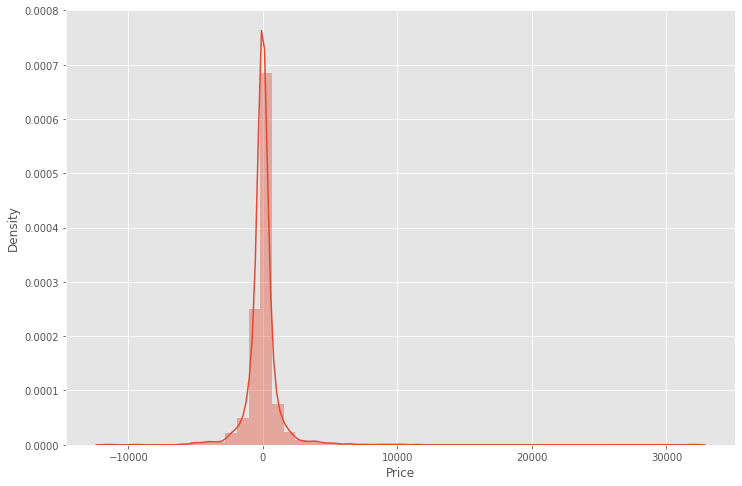

In [586]:
plt.style.use('ggplot')
plt.figure(figsize = (12, 8))
sns.distplot(y_test - y_pred)
plt.show()

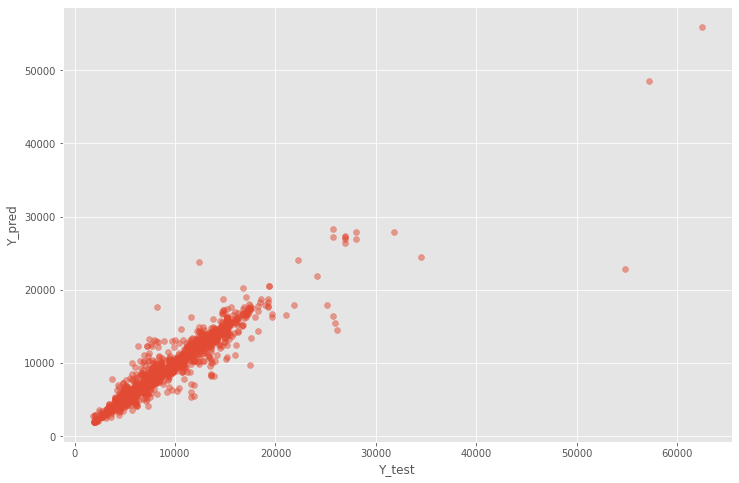

In [587]:
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

## Lastly, We have to estimate the error

In [588]:
from sklearn import metrics

In [591]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('The mean absolute error is : ', mae)

The mean absolute error is :  590.5431606130833


In [593]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('The mean squared error is : ', mse)

The mean squared error is :  1868037.2840431377


In [594]:
rmse = np.sqrt(mse)
print('The mean absolute error is : ', rmse)

The mean absolute error is :  1366.7616046857395


## The R-squared error

In [595]:
R2 = metrics.r2_score(y_test, y_pred)
print("The r2 score is :", R2)

The r2 score is : 0.9128662492459018
